In [1]:
# we first load the class module

import dipolarBEC

In [2]:
# necessary python modules

from tqdm import tqdm
import numpy as np
import os
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import kn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl        
mpl.rcParams['text.usetex'] = True
import seaborn
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 14}
mpl.rc('font', **font)

pal = seaborn.color_palette("tab10")
print(pal.as_hex())

# if seaborn does not work, try: pip install seaborn

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [4]:
#check which interaction is used and save fig in the appropriate subfolder

fv = 'NN'  # 'd' or 'NN'

path_dict = {
    'd': "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\dip\\",
    'NN': "C:\\Users\\camipolv\\Desktop\\dipbec\\fig\\NN\\"
}

fpath = path_dict.get(fv, "Default path")
print(fpath)

Ust = r"$U_{NN}$" if fv == "NN" else r"$U_d$" if fv == "d" else None
Ucs = r"$/U_c$"

C:\Users\camipolv\Desktop\dipbec\fig\NN\


In [5]:
#parameters

Ndisr = 100
Nmesh = 1000

N0 = 2
N1=100
N2=250
N3=500

kx_small = 0.01
kx_large_dict = {'d': 8.0, 'NN': 25.0}
kx_large = kx_large_dict.get(fv, "Default value")

Uc = 1.0

#NN: Ud << Uc/2, d: Ud << Uc/3
Ud1_dict = {'d': 0.0, 'NN': 0.0}
Ud2_dict = {'d': 0.2, 'NN': 0.2}
Ud3_dict = {'d': 0.3, 'NN': 0.5}
Ud1 = Ud1_dict.get(fv, "Default value")
Ud2 = Ud2_dict.get(fv, "Default value")
Ud3 = Ud3_dict.get(fv, "Default value")

sigma1 = 0.0
sigma2 = 0.2
sigma3 = 0.4

t1 = 1.0
t2 = 5.0
t3 = 7.0

Ns = [N1, N2, N3]
kxs = [kx_small, kx_large]
sigmas = [sigma1, sigma2, sigma3]
Uds = [Ud1, Ud2, Ud3]

markers = ['s', 'o', '^']

In [5]:
def Vk(l,kx):
    return 2*kx*kn(1,abs(l)*kx)/(abs(l))

[0.49999836995650554, 0.4999963417493083]


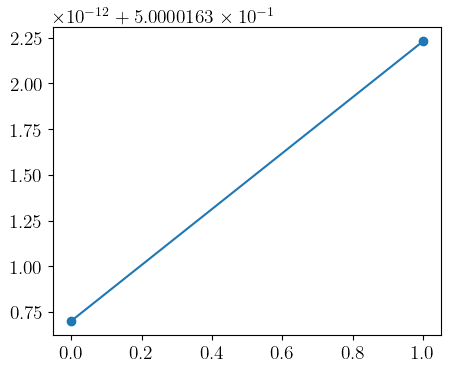

In [7]:
# first try: just run for a fixed N 

Ntubes = N0
kx = kxs[1]
Ud = Uds[1]
sigma = sigmas[0]

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

def func(x, a, L):
    return a * np.exp(x/L)

run = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)
iprs = run.iprAllStates(nb)
print(iprs[1])

val,U,V = run.BogUV(nb)
#np.set_printoptions(precision=5, suppress=True)
#print(U)
#print(V)

xdata = range(len(run.wfLowestState()))
ydata = run.wfLowestState()

#popt, pcov = curve_fit(func, xdata, ydata)
# Print the optimal parameters a, L
#print("Optimal parameters are: a=%f, L=%f" % (popt[0], popt[1]))

plt.figure(figsize=(5,4))
plt.plot(xdata, ydata, marker='o')
plt.show()

C:\Users\camipolv\AppData\Local\Temp\ipykernel_26952\3376210517.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*kx*kn(1,abs(l)*kx)/(abs(l))


nan


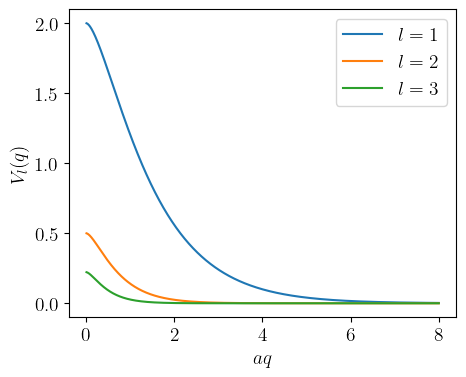

In [7]:
Nmesh = 1000
kxar = np.linspace(0, 8, Nmesh)
var = [[Vk(l,kx) for kx in kxar] for l in range(1,4)]
print(var[0][0])

plt.figure(figsize=(5,4))
for i in range(3):
    plt.plot(kxar,var[i],label=r"$l=%d$"%(i+1))
plt.xlabel(r"$aq$", fontsize=14)
plt.ylabel(r"$V_l(q)$", fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()  

nb = [1.383622   0.938141   0.64897209 1.27193673 1.11143972 1.03925783
 0.72813938 0.70677037 0.8355175  0.98243795 1.0712479  1.00350892
 1.05118898 0.62354993 0.83341545 0.71188532 0.77144777 1.0888484
 0.62970835 1.04908909 0.81303925 1.06963758 0.69248862 1.12610482
 0.62193656 1.00649935 0.99995273 1.03640805 0.92143277 1.10815366
 1.10948308 1.21347985 1.12907642 1.39821198 1.15919548 1.23817393
 0.97885386 1.38693618 1.31117725 1.16076306 1.15804269 1.06234223
 1.22026879 1.06339989 1.25704446 0.69204818 0.66425077 1.04888387
 0.63177659 0.91778508 1.11362387 0.80332227 1.32083561 0.84562641
 0.8023683  1.10097728 0.67728386 1.08982065 1.27877769 0.85439425
 1.38139706 1.20417493 0.82965385 0.6978546  1.15156277 0.74165085
 0.80665214 0.98099299 1.10193975 1.21616285 0.79894149 0.83933848
 0.96777018 0.73364604 0.90095514 0.84268477 0.60449183 1.05569774
 1.13746323 0.88267148 0.7543441  0.99110134 0.70466032 1.37423322
 1.14711812 0.71201547 1.04288565 0.91139926 0.95899294 0.

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [02:16<00:00,  7.34it/s]
c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\camipolv\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


csi = [1.4406363202538814, 1.1862594565591777, 0.9866398186661869, 1.3812693803622826, 1.2911853416395396, 1.2485538610700841, 1.0450880654026256, 1.0296385584489447, 1.1194982127291901, 1.2139427196098442, 1.2676244887995711, 1.2268917571881741, 1.2557003903295432, 0.9671219625298668, 1.1180890706484823, 1.0333576234000248, 1.0757191363966878, 1.277995541514987, 0.9718860662387941, 1.2544455483998722, 1.1043363975179763, 1.2666713749069405, 1.0191824842250348, 1.2996758153271732, 0.9658699907319419, 1.228718448048401, 1.2247159239031022, 1.2468408351134386, 1.175648394598185, 1.2892751774158981, 1.2900483031987862, 1.349155206958095, 1.3013894982972745, 1.4482119916101384, 1.3186330871595855, 1.3628135951343128, 1.2117263700688738, 1.442360657146861, 1.4024143001814906, 1.3195243787037496, 1.3179772512936418, 1.2623443867116833, 1.3529239406819893, 1.2629726209393366, 1.3731593812726912, 1.0188583147282455, 0.998186434324099, 1.254322848707615, 0.9734808079299578, 1.1733190630780088, 

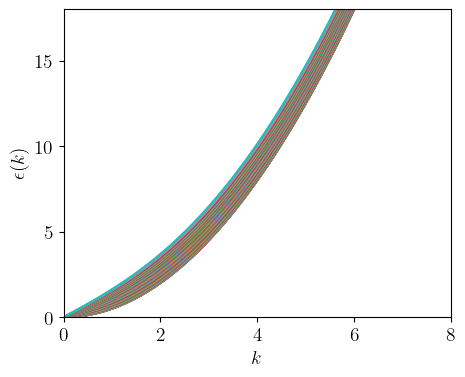

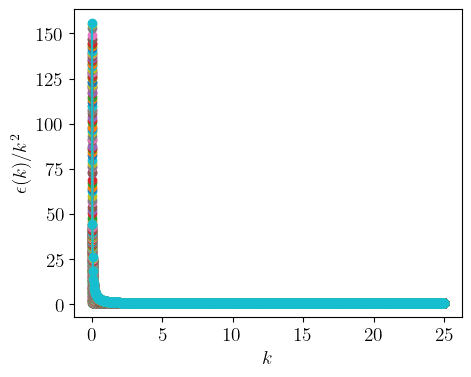

In [8]:
# check if sigma is in the correct range

Ntubes = 100 
Ud = Uds[2] 
sigma = sigmas[2]


kxar = np.linspace(kxs[0], kxs[1], Nmesh)

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)
print(f'nb = {nb}')

e_k = []
ed_k = []

for kx in tqdm(kxar):
    run_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)
    e_k.append((run_k.BogUV(nb)[0]))
    ed_k.append((run_k.BogUV(nb)[0])/(kx**2))

ek = np.array(e_k)
edk = np.array(ed_k)
ekt = ek.T
edkt = edk.T


csi = [np.sqrt((Uc + Ud)*nb[i]) for i in range(Ntubes)] # healing length for each tube

print(f'csi = {csi}')

#ek
plt.figure(figsize=(5,4))
for i in range(len(ekt)):
    plt.plot(kxar, ekt[i], label=f'eval {i+1}')
#plt.xlim(0, 8)
#plt.ylim(0, 18)
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$\epsilon(k)$', fontsize=14)
plt.show()


#edk
plt.figure(figsize=(5,4))
for i, ydata in enumerate(edkt):
    plt.plot(kxar, ydata, label=f'eval {i+1}', marker='o')
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$\epsilon(k)/k^2$', fontsize=14)
plt.show()


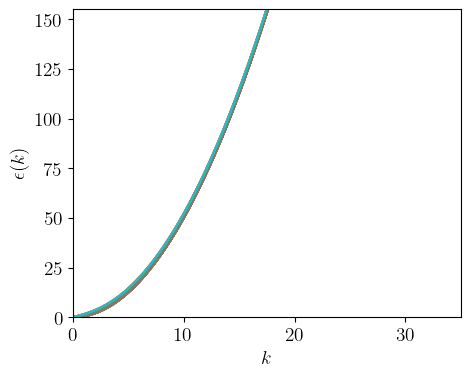

In [23]:
#ek
plt.figure(figsize=(5,4))
for i in range(len(ekt)):
    plt.plot(kxar, ekt[i], label=f'eval {i+1}')
plt.xlim(0,35)
plt.ylim(0, 155)
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$\epsilon(k)$', fontsize=14)
plt.show()

In [9]:
# check if sigma is in the correct range

Ntubes = 4
Uda = Uds[0] 
#Udb = Uds[2]
Udb = 0.3
sigmaa = sigmas[0]
#sigmab = sigmas[2]
sigmab = 0.5


kxar = np.linspace(kxs[0], kxs[1], Nmesh)

nba = np.random.uniform(1-sigmaa, 1+sigmaa, Ntubes)
nbb = np.random.uniform(1-sigmab, 1+sigmab, Ntubes)

e_kaa = []
e_kab = []
e_kba = []

#ekaa
for kx in tqdm(kxar):
    run_kaa = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Uda, Ndisr, sigmaa)
    e_kaa.append((run_kaa.BogUV(nba)[0]))
ekaa = np.array(e_kaa)
ektaa = ekaa.T

#ekab (asymmetric split)
for kx in tqdm(kxar):
    run_kab = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Uda, Ndisr, sigmab)
    e_kab.append((run_kab.BogUV(nbb)[0]))
ekab = np.array(e_kab)
ektab = ekab.T

#ekba (symmetric split)
for kx in tqdm(kxar):
    run_kba = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Udb, Ndisr, sigmaa)
    e_kba.append((run_kba.BogUV(nba)[0]))
ekba = np.array(e_kba)
ektba = ekba.T

100%|██████████| 1000/1000 [00:00<00:00, 2721.43it/s]


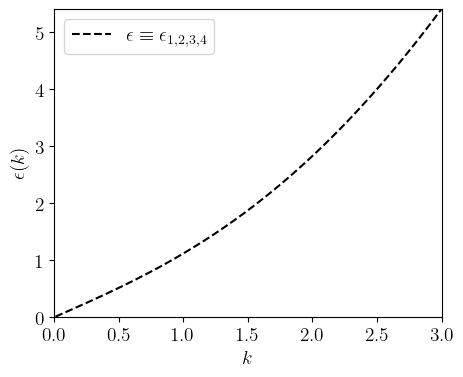

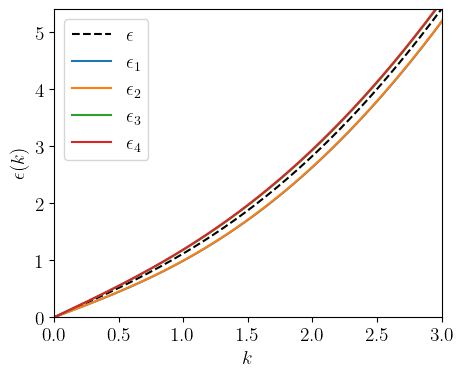

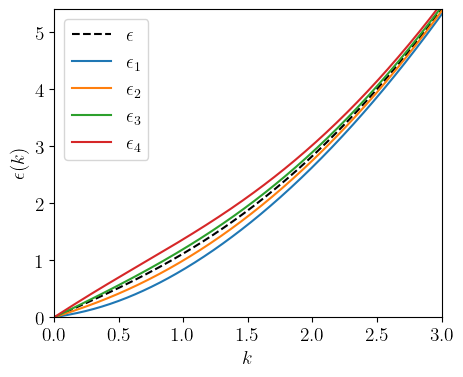

In [10]:
#ekaa
plt.figure(figsize=(5,4))
plt.plot(kxar, ektaa[0], '--', label=f'$\epsilon\equiv \epsilon_{{1,2,3,4}}$', color='black')
plt.xlim(0,3)
plt.ylim(0, 5.4)
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$\epsilon(k)$', fontsize=14)
plt.legend()
plt.show()

#ekab
plt.figure(figsize=(5,4))
plt.plot(kxar, ektaa[0], '--', label=f'$\epsilon$', color='black')
for i in range(len(ektab)):
    plt.plot(kxar, ektab[i], label=f'$\epsilon_{i+1}$')
plt.xlim(0, 3)
plt.ylim(0, 5.4)
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$\epsilon(k)$', fontsize=14)
plt.legend()
plt.show()

#ekba
plt.figure(figsize=(5,4))
plt.plot(kxar, ektaa[0], '--', label=f'$\epsilon$', color='black')
for i in range(len(ektba)):
    plt.plot(kxar, ektba[i], label=f'$\epsilon_{i+1}$')
plt.xlim(0, 3)
plt.ylim(0, 5.4)
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$\epsilon(k)$', fontsize=14)
plt.legend()
plt.show()

In [11]:
# let's plot u's,v's vs k for N=2 and fixed Ud,sigma

Ntubes = N0
Ud = Uds[2]
sigma = sigmas[2]

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

kdar = np.arange(kxs[0], kxs[1], 0.1)

U_k = []
V_k = []

for kx in tqdm(kdar):

    runk = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma)

    U_k.append( runk.BogUV(nb)[1] )
    V_k.append( runk.BogUV(nb)[2] )

# Convert U_k and V_k to numpy arrays
U_k_array = np.array(U_k)
V_k_array = np.array(V_k)

# Get the shape of the matrices
n, m, p = U_k_array.shape

100%|██████████| 80/80 [00:00<00:00, 1156.91it/s]


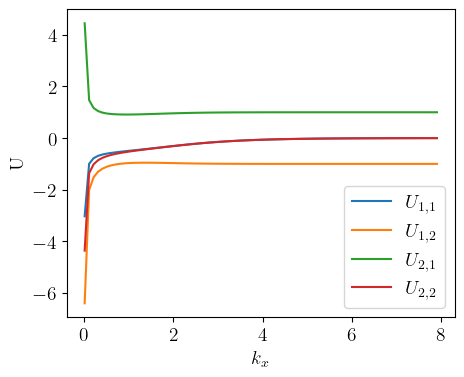

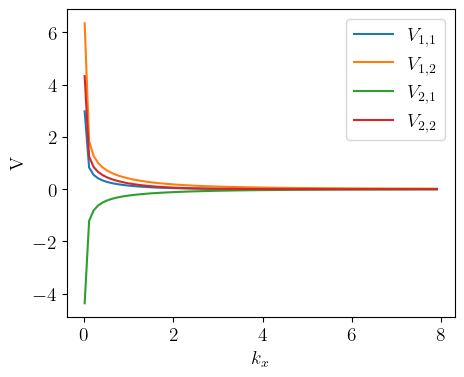

In [12]:
plt.figure(figsize=(5,4))

for i in range(m):
    for j in range(p):
        U_ij = U_k_array[:, i, j]

        # Check the sign of each U_ij by comparing it to the first element of each - viscosity not affected bc of U(1) symmetry
        
        U_ij = np.where(np.sign(U_ij[0]) == np.sign(U_ij), U_ij, -U_ij)
        
        # Now U_ij and V_ij are arrays of the (i, j) component of each matrix in U_k and V_k
        plt.plot(kdar, U_ij, label=r'$U_{{{},{}}}$'.format(i+1, j+1))


plt.ylabel("U", fontsize=14)
plt.xlabel(r"$k_x$", fontsize=14)
#plt.title('U vs k', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()


plt.figure(figsize=(5,4))

for i in range(m):
    for j in range(p):
        V_ij = V_k_array[:, i, j]
        # Check the sign of each V_ij by comparing it to the first element of each - viscosity not affected bc of U(1) symmetry
        V_ij = np.where(np.sign(V_ij[0]) == np.sign(V_ij), V_ij, -V_ij)
        # Now V_ij are arrays of the (i, j) component of each matrix in V_k
        plt.plot(kdar, V_ij, label=r'$V_{{{},{}}}$'.format(i+1, j+1))

plt.ylabel("V", fontsize=14)
plt.xlabel(r"$k_x$", fontsize=14)
#plt.title('V vs k', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

In [13]:
# we're plotting the spatial (y-axis) distribution of the lowest wavefunction for three values of N=10,100,1000, for fixed Ud/Uc and fixed sigma,
# at small k (_sk) and large k (_lk)

Ud = Uds[1]
sigma = sigmas[1]

runs_sk = [dipolarBEC.dipolarBEC(N, kxs[0], Uc, Ud, Ndisr, sigma) for N in Ns]
runs_lk = [dipolarBEC.dipolarBEC(N, kxs[1], Uc, Ud, Ndisr, sigma) for N in Ns]

wf_sk = [run.wfLowestState() for run in runs_sk]
wf_lk = [run.wfLowestState() for run in runs_lk]

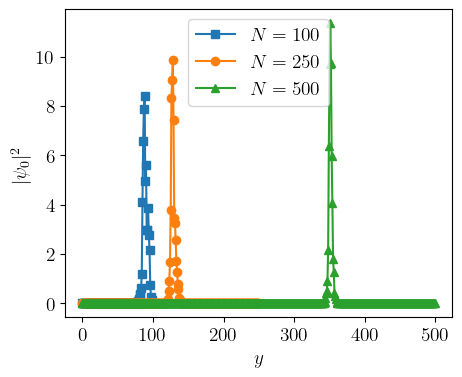

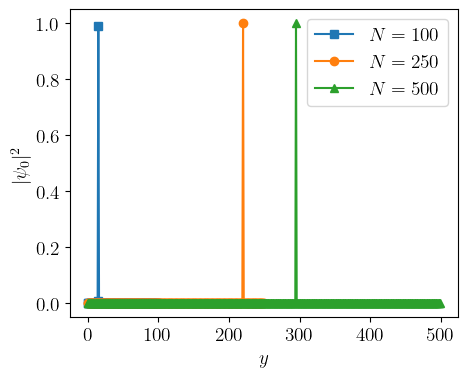

In [14]:
# function to plot the wavefunction profile of the ground state along y-axis
def plot_wf(wf, title, filename):
    plt.figure(figsize=(5,4))
    for i in range(len(Ns)):
        plt.plot(range(len(wf[i])), wf[i], label=r'$N = {}$'.format(Ns[i]), marker=markers[i])
    plt.ylabel(r"$|\psi_0|^2$", fontsize=14)
    plt.xlabel(r"$y$", fontsize=14)
    plt.legend(loc='best', fontsize=14)
    #save plot in jpg and pdf
    plt.savefig(os.path.join(fpath, filename.format(Ud, sigma)) + ".jpg", format='jpg', bbox_inches='tight')
    plt.savefig(os.path.join(fpath, filename.format(Ud, sigma)) + ".pdf", format='pdf', bbox_inches='tight')
    plt.show()

# small k
plot_wf(wf_sk, 'Small k', "wf0_vs_y_$U_d={}_s={}_sk$")

# large k
plot_wf(wf_lk, 'Large k', "wf0_vs_y_$U_d={}_s={}_lk$")